In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 16.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 22.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


# 1.Importing all the libraries


In [5]:
 #Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# Defining thh path of testing, Training, Valadating
# Visualizing Sample Images with Corresponding Annotations


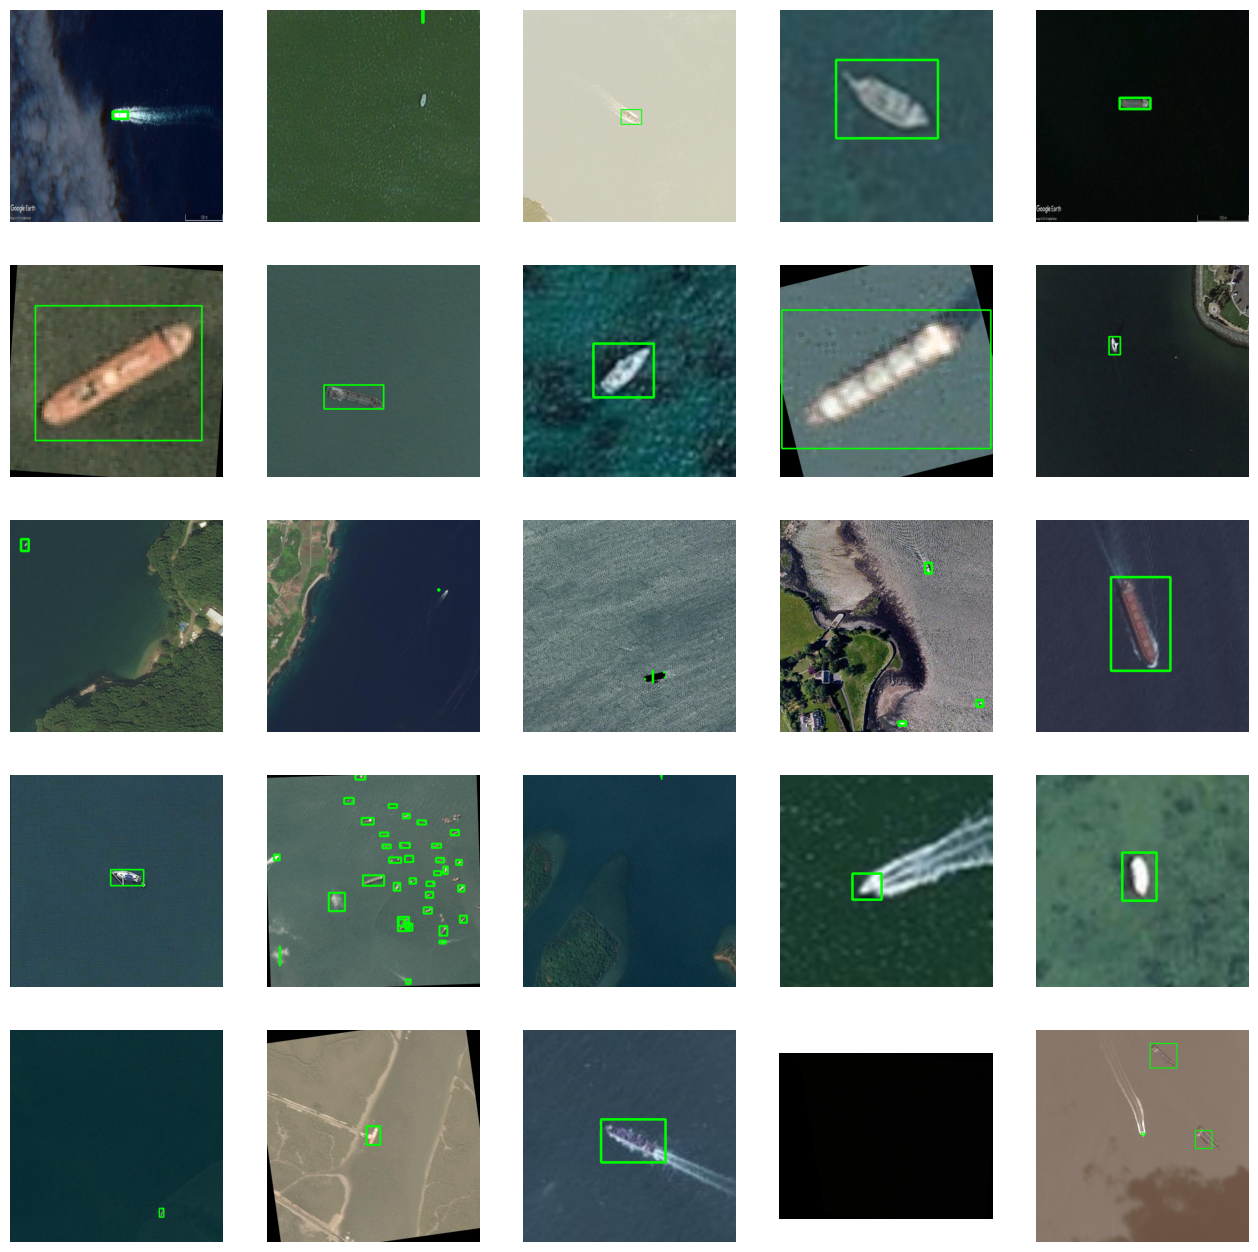

In [6]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Koi bhi random 20 pic utahye hai taaki image aur label test ho jayee...

random_images = random.sample(image_files, 25)

# Set up the plot
fig, axs = plt.subplots(5, 5, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 5
    col = i % 5
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [18]:
 x_min = int((x_center - width/2) * image.shape[1])
x_min

158

In [7]:
image = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/02e39612d_jpg.rf.cc5483bb711f080d12b644ff62cf977a.jpg")

# Get the size of the image
#channels =RGB.

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 768x768 and 3 channels.


In [9]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
            epochs = 2,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics YOLOv8.0.116 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml, epochs=2, patience=50, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 146MB/s]
AMP: checks passed ✅
train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [01:13<00:00, 132.23it/s]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]
train: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not wri

In [14]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 768x768 (no detections), 48.1ms
Speed: 6.2ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 47.6ms
Speed: 4.4ms preprocess, 47.6ms inference, 1.9ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 47.7ms
Speed: 3.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 43.9ms
Speed: 3.4ms preprocess, 43.9ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 43.7ms
Speed: 3.6ms preprocess, 43.7ms inference, 0.9ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 43.6ms
Speed: 3.5ms preprocess, 43.6ms inference, 0.8ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 43.6ms
Speed: 4.0ms preprocess, 43.6ms inference, 1.7ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 43.3ms
Speed: 7.2ms preprocess, 43.3ms inference, 0.8ms po

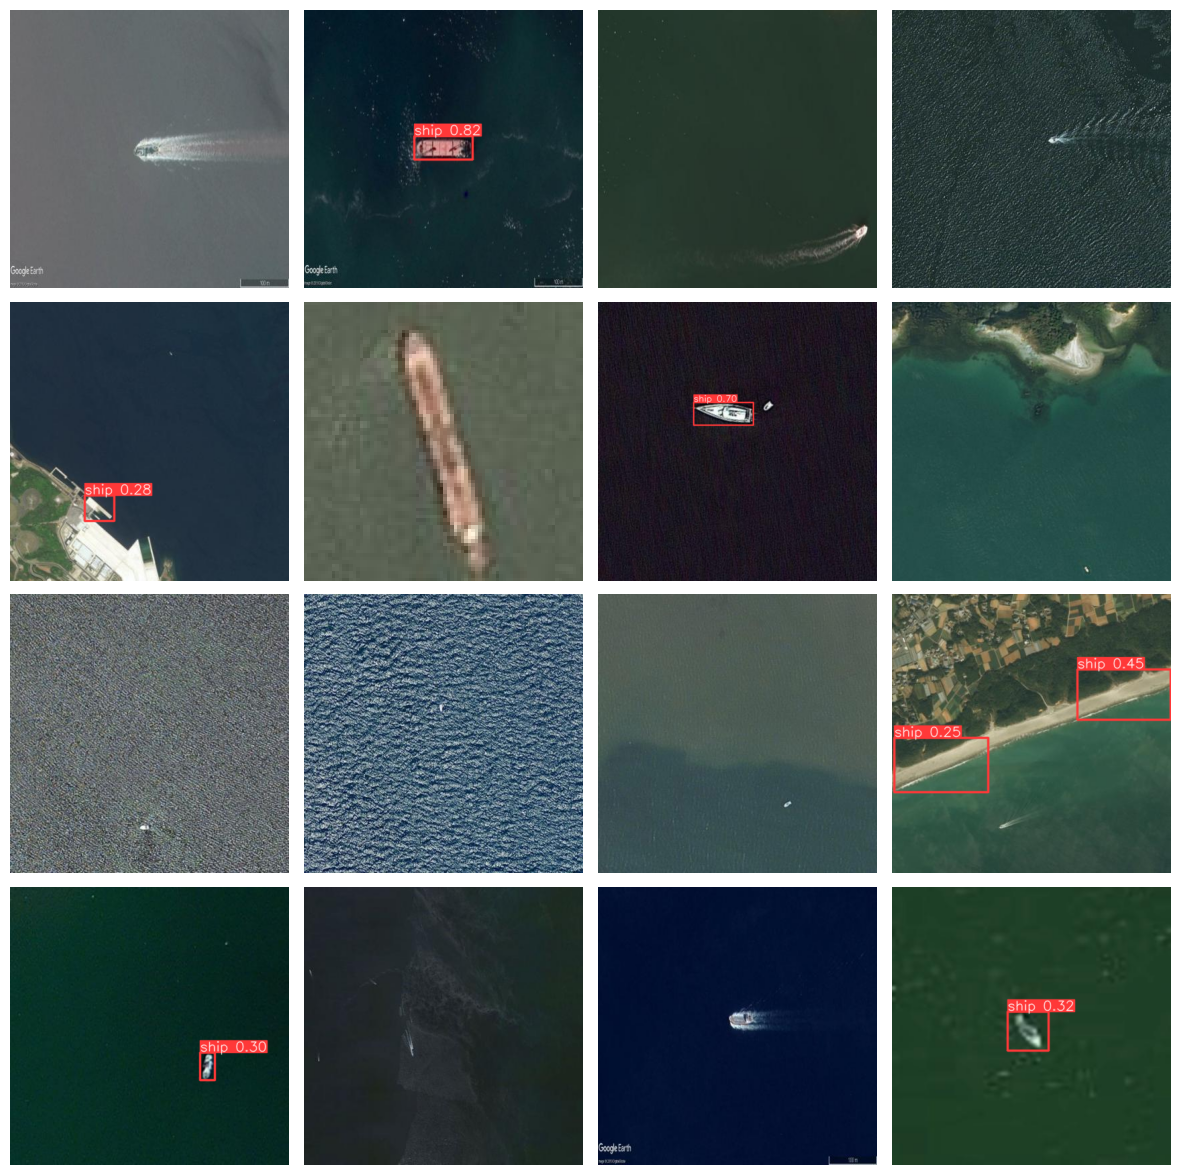

In [28]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files,20)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i //5
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)



0: 768x768 1 ship, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.6ms postprocess per image at shape (1, 3, 768, 768)


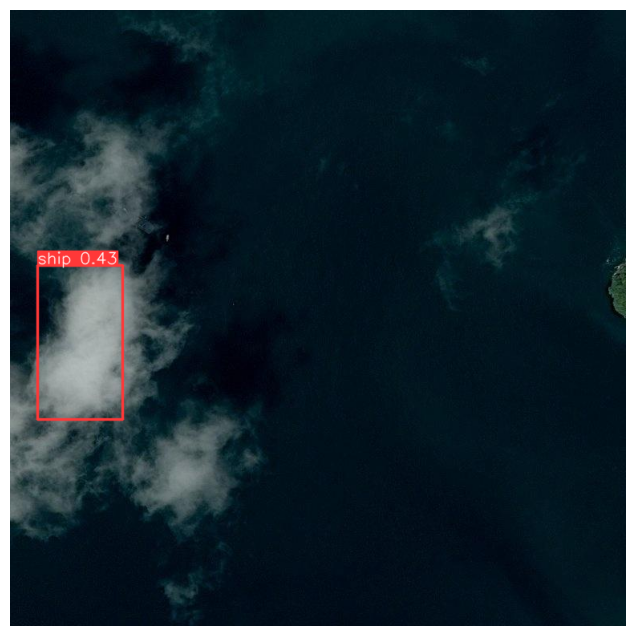

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/3c1500d64_jpg.rf.68fdc8141c7b0982a003822b12a5c2b2.jpg")

# Pass the image through the detection model and get the result
detect_result = model(img)

# Get the detection image from the result
detect_img = detect_result[0].plot()

# Convert the image to RGB format
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the detection image
ax.imshow(detect_img)
ax.axis('off')

# Show the plot
plt.show()



0: 768x768 (no detections), 47.7ms
Speed: 2.4ms preprocess, 47.7ms inference, 1.1ms postprocess per image at shape (1, 3, 768, 768)


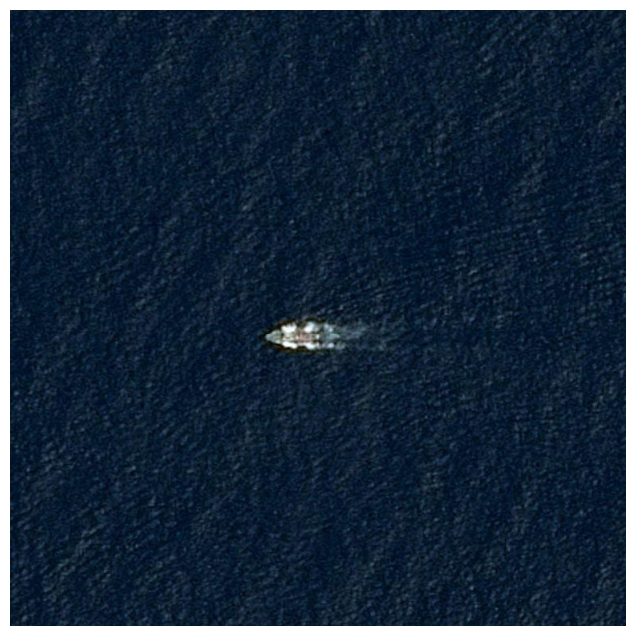

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/498ea3a78_jpg.rf.7e538695b959e240c96a875185f5a3d1.jpg")

# Pass the image through the detection model and get the resultjpg
detect_result = model(img)

# Get the detection image from the result
detect_img = detect_result[0].plot()

# Convert the image to RGB format
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the detection image
ax.imshow(detect_img)
ax.axis('off')

# Show the plot
plt.show()